# Solución incorrecta
lo que hice fue tratar de crear un modelo que pueda predecir la clase, diferenciando entre tipo1, tipo2 y tipo3. Lo que debería haber hecho es entrenar un modelo para predecir tipo1 (mapeo de la siguiente manera: {tipo1:1, tipo2:0, tipo3:0}), luego otro modelo para el tipo2 y por último otro modelo para el tipo 3. Es por este motivo que se llega siempre al límite de intentos al entrenar al perceptrón, porque nunca está logrando predecir todos los 200 registros diferenciando entre los 3 tipos, recordar que el perceptrón se usa para elegir entre 2 opciones. Al final debería comparar cuál modelo tiene la mejor precisión

In [113]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron

In [114]:
df = pd.read_csv(DATOS_DIR + "semillas.csv")
df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


In [115]:
df.Clase.unique()

array(['Tipo1', 'Tipo2', 'Tipo3'], dtype=object)

In [116]:
mapeo = {"Clase":{"Tipo1":1, "Tipo2":2, "Tipo3":3}}
df.replace(mapeo, inplace=True)
df.sample(15)

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
39,14.28,14.17,0.8944,5.397,3.298,6.6850,5.001,1
44,15.11,14.54,0.8986,5.579,3.462,3.1280,5.180,1
107,17.63,15.86,0.8800,6.033,3.573,3.7470,5.929,2
43,15.50,14.86,0.8820,5.877,3.396,4.7110,5.528,1
199,12.76,13.38,0.8964,5.073,3.155,2.8280,4.830,3
74,16.82,15.51,0.8786,6.017,3.486,4.0040,5.841,2
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
60,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607,1
88,21.18,17.21,0.8989,6.573,4.033,5.7800,6.231,2
54,14.52,14.60,0.8557,5.741,3.113,1.4810,5.487,1


In [117]:
X = np.array(df.iloc[:,:-1])#array con las primeras 7 columnas
T = np.array(df['Clase'])#array con la última columna

X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizador= preprocessing.StandardScaler() #media y desvío
X_train = normalizador.fit_transform(X_train)
X_test  = normalizador.transform(X_test)

print(X_test)

[[-0.59266621 -0.58718331 -0.15859162 -0.43797084 -0.75573625 -1.92059837
  -0.75288629]
 [-1.23531883 -1.23348841 -1.15455703 -1.27022837 -1.31155634  0.38159685
  -0.86842991]
 [ 1.56651057  1.61025402  0.32504591  1.63585119  1.40986465 -0.51624529
   1.57655568]
 [-0.72867735 -0.92174124  1.07919256 -1.30433728 -0.28381354 -0.60556292
  -1.21918734]
 [-1.18431465 -1.31712789 -0.07252054 -1.45214258 -1.08346036 -0.69088125
  -1.67929855]
 [-1.26252105 -1.17265969 -1.83492847 -0.90185209 -1.54227411  1.38408726
  -0.41657182]
 [-0.37504839 -0.41990434  0.38242663 -0.6153372  -0.28381354 -1.45074765
  -0.94889779]
 [-0.92249321 -0.93694842 -0.49877734 -0.92459136 -0.92877458  0.74686596
  -0.54243183]
 [ 0.5226251   0.50012997  0.73490822  0.53981805  0.63381397 -1.17812891
   0.23129778]
 [-0.71847651 -0.8076874   0.34963764 -0.96097421 -0.54861462  1.16412593
  -0.95508763]
 [ 0.83545071  0.88791303  0.34553902  1.13331317  0.81471767 -0.14031138
   1.13501398]
 [-1.35772885 -1.3627

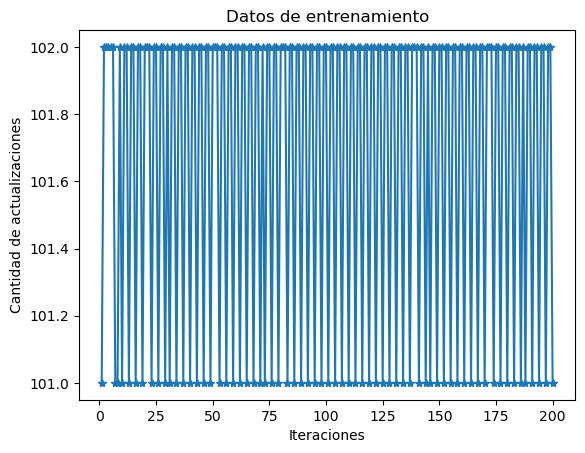

In [118]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [122]:
contador = [[0,0], [0,0], [0,0]] #(aciertos, cantidad) para cada uno de los 3 tipos
Y_test = ppn.predict(X_test)

for i in range(1, len(T_test)):
    prediccion = ppn.predict(X_test[i])
    esperado = T_test[i]
    contador[esperado-1][1]+=1
    if (esperado == prediccion):
        contador[esperado-1][0]+=1

clase = 1
for resultado in contador:
    aciertos=resultado[0]
    cantidad=resultado[1]
    print("clase",clase,"precisión:",aciertos/cantidad*100)
    clase+=1
    
print("%% de aciertos totales = %.2f %%" % (100 * nAciertos / X_test.shape[0]))

clase 1 precisión: 89.47368421052632
clase 2 precisión: 0.0
clase 3 precisión: 0.0
% de aciertos totales = 28.57 %


In [120]:
print(Y_test)
print(T_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 3 2 3 1 3 1 3 1 3 2 3 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 2 1 3 3 1 2 1 2 2 3
 2 2 3 3 3 3 2 3 1 3 2 2 1 1 3 2 1 1 2 2 1 1 1 3 1 2]
